In [1]:
import sys
sys.path.insert(0,"/users/PCON0003/cond0068/.local/lib/python3.7/")
sys.path.append("/users/PAS0654/osu8354/ARA_cvmfs/root_build/lib/") # go to parent dir
sys.path.append("/users/PCON0003/cond0068/.local/lib/python3.7/site-packages/")
import ROOT
import math
import numpy as np
from ROOT import TH1D,TF1, gRandom, gPad, gStyle
import matplotlib.pyplot as plt
from ROOT import TChain, TSelector, TTree
import os
import matplotlib.colors as mcolors
import scipy
# import scipy

Welcome to JupyROOT 6.18/04


In [2]:
file_list=[]#Define an empty list
for filename in os.listdir("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/reco/fixed_files/atZero/300m_direct/"):#Loop over desired directory
    if filename.endswith(".root"): #extension, .root in this case
        file_list.append(os.path.join("/users/PAS0654/osu8354/ARA_cvmfs/source/AraRoot/analysis/reco/fixed_files/atZero/300m_direct/", str(filename))) #add file name to the list

In [3]:
chain = TChain("OutputTree") #Define chain and tree that needs to be read. "RecoVals" in this case.
for line in file_list:
    chain.AddFile(line)

In [4]:
phi = []
theta = []
phi_h = []
theta_h = []
viewAnglAvg = []
corr_value = []
weights = []
for entry in chain:
#     if(entry.peakCorr_single[0]<0.01): continue
#     if(entry.peakPhi_single[0]<0):
#         phi.append(entry.peakPhi_single[0]+180) #extract variables of interest
#     else:
    phi.append(entry.peakPhi_single[0]) 
    phi_h.append(entry.peakPhi_single[1]) 
    theta.append(entry.peakTheta_single[0]+90)
    theta_h.append(entry.peakTheta_single[1]+90)
    viewAnglAvg.append(entry.viewAngleAvg[0])
    corr_value.append(entry.peakCorr_single[0])
    weights.append(entry.weight)

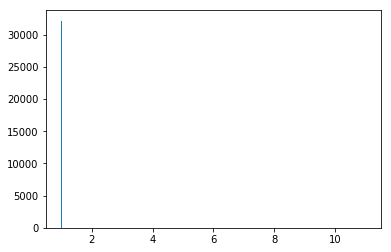

In [5]:
plt.hist(weights, bins=500);

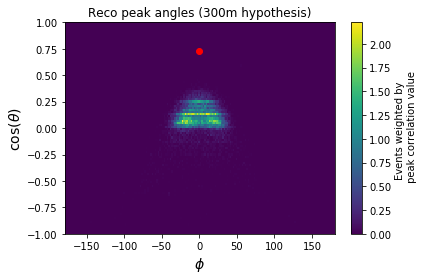

In [16]:
# plt.style.use("default")
plt.hist2d(phi,np.cos(np.radians(theta)), bins=[180,100], weights=corr_value);
plt.colorbar(label="Events weighted by \n peak correlation value")
plt.scatter(0,np.cos(np.radians(43)), color="red")
plt.xlabel("$\phi$", fontsize=14)
plt.ylabel("$\cos(\\theta)$", fontsize=14)
plt.title("Reco peak angles (300m hypothesis)")
plt.tight_layout()
# plt.savefig("CenA_reco_peak300m_CskyWeight_direct_Hpol.pdf")

In [17]:
np.cos(np.radians(43))

0.7313537016191705

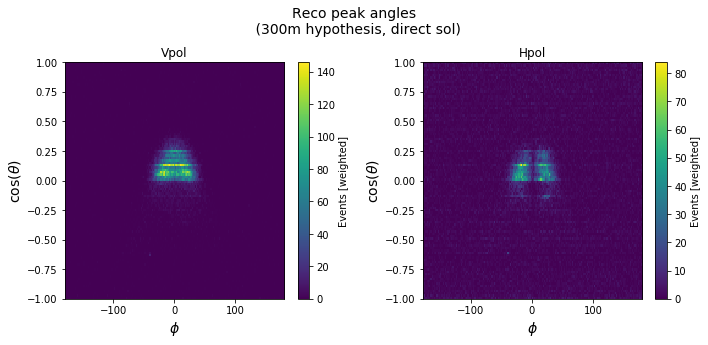

In [18]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5))
cm = plt.cm.get_cmap('viridis')
p1 = ax[0].hist2d(phi,np.cos(np.radians(theta)), bins=[180,100],weights=weights,cmap=cm)
# plt.hist2d(phi_h,np.cos(np.radians(theta_h)), bins=[180,100]);
plt.colorbar(p1[3],ax=ax[0],label="Events [weighted]")
# ax[0].scatter(0,np.cos(np.radians(43)), color="red")
ax[0].set_xlabel("$\phi$", fontsize=14)
ax[0].set_ylim(-1,1)
ax[0].set_ylabel("$\cos(\\theta)$", fontsize=14)
ax[0].set_title("Vpol")

p2 = ax[1].hist2d(phi_h,np.cos(np.radians(theta_h)),weights=weights, bins=[180,100],cmap=cm)
# plt.hist2d(phi_h,np.cos(np.radians(theta_h)), bins=[180,100]);
plt.colorbar(p2[3],ax=ax[1],label="Events [weighted]")
# ax[1].scatter(0,np.cos(np.radians(43)), color="red")
ax[1].set_xlabel("$\phi$", fontsize=14)
ax[1].set_ylim(-1,1)
ax[1].set_ylabel("$\cos(\\theta)$", fontsize=14)
ax[1].set_title("Hpol")
plt.suptitle("Reco peak angles \n (300m hypothesis, direct sol)", fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, .9])
plt.savefig("CenA_reco_peak300m_NoWeight_direct.pdf")

85.0

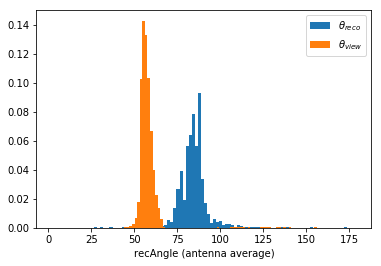

In [19]:
plt.hist(theta, bins=100, density=True, label="$\\theta_{reco}$");
plt.hist(np.degrees(viewAnglAvg), bins=100,density=True,label="$\\theta_{view}$" );
# plt.axvline(np.degrees(0.82), color="red")
plt.xlabel("recAngle (antenna average)")
plt.legend()
np.mean(np.degrees(viewAnglAvg))
np.median(theta)


0.3436276642018269

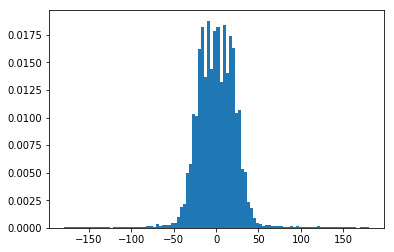

In [20]:
plt.hist(phi, bins=100, density=True);
np.mean(phi)

(0, 90)

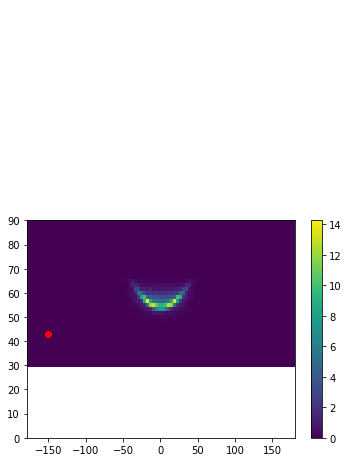

In [21]:
plt.hist2d(phi,np.degrees(viewAnglAvg), bins=[90,90],weights=corr_value);
plt.colorbar()
plt.scatter(np.degrees(0.523)-180,43, color="red")
plt.ylim(0,90)

In [168]:
len(phi)

12771

In [7]:
def map_2D(x,y,filename="foo"):
    from matplotlib.ticker import NullFormatter, MaxNLocator
    from numpy import linspace
    # plt.ion()

    # x=phi
    # y=theta

    # Set up default x and y limits
    xlims = [-180,180]
    ylims = [-90,90]

    # Set up your x and y labels
    xlabel = '$\phi$'
    ylabel = '$\\theta}$'

    # Define the locations for the axes
    left, width = 0.12, 0.55
    bottom, height = 0.12, 0.55
    bottom_h = left_h = left+width+0.02

    # Set up the geometry of the three plots
    rect_temperature = [left, bottom, width, height] # dimensions of temp plot
    rect_histx = [left, bottom_h, width, 0.25] # dimensions of x-histogram
    rect_histy = [left_h, bottom, 0.25, height] # dimensions of y-histogram

    # Set up the size of the figure
    fig = plt.figure(1, figsize=(9,9))

    # Make the three plots
    axTemperature = plt.axes(rect_temperature) # temperature plot
    axHistx = plt.axes(rect_histx) # x histogram
    axHisty = plt.axes(rect_histy) # y histogram

    # Remove the inner axes numbers of the histograms
    nullfmt = NullFormatter()
    axHistx.xaxis.set_major_formatter(nullfmt)
    axHisty.yaxis.set_major_formatter(nullfmt)

    # Find the min/max of the data
    xmin = min(xlims)
    xmax = max(xlims)
    ymin = min(ylims)
    ymax = max(y)

    # Make the 'main' temperature plot
    # Define the number of bins
    nxbins = 50
    nybins = 50
    nbins = 100

    xbins = linspace(start = xmin, stop = xmax, num = nxbins)
    ybins = linspace(start = ymin, stop = ymax, num = nybins)
    xcenter = (xbins[0:-1]+xbins[1:])/2.0
    ycenter = (ybins[0:-1]+ybins[1:])/2.0
    aspectratio = 1.0*(xmax - 0)/(1.0*ymax - 0)

    H, xedges,yedges = np.histogram2d(y,x,bins=(ybins,xbins))
    X = xcenter
    Y = ycenter
    Z = H

    # Plot the temperature data
    cax = (axTemperature.imshow(H, extent=[xmin,xmax,ymin,ymax],
           interpolation='nearest', origin='lower',aspect=aspectratio))

    # Plot the temperature plot contours
    # contourcolor = 'white'
    # xcenter = np.mean(x)
    # ycenter = np.mean(y)
    # ra = np.std(x)
    # rb = np.std(y)
    # ang = 0

    # X,Y=ellipse(ra,rb,ang,xcenter,ycenter)
    # axTemperature.plot(X,Y,"k:",ms=1,linewidth=2.0)
    # axTemperature.annotate('$1\\sigma$', xy=(X[15], Y[15]), xycoords='data',xytext=(10, 10),
    #                        textcoords='offset points', horizontalalignment='right',
    #                        verticalalignment='bottom',fontsize=25)

    # X,Y=ellipse(2*ra,2*rb,ang,xcenter,ycenter)
    # axTemperature.plot(X,Y,"k:",color = contourcolor,ms=1,linewidth=2.0)
    # axTemperature.annotate('$2\\sigma$', xy=(X[15], Y[15]), xycoords='data',xytext=(10, 10),
    #                        textcoords='offset points',horizontalalignment='right',
    #                        verticalalignment='bottom',fontsize=25, color = contourcolor)

    # X,Y=ellipse(3*ra,3*rb,ang,xcenter,ycenter)
    # axTemperature.plot(X,Y,"k:",color = contourcolor, ms=1,linewidth=2.0)
    # axTemperature.annotate('$3\\sigma$', xy=(X[15], Y[15]), xycoords='data',xytext=(10, 10),
    #                        textcoords='offset points',horizontalalignment='right',
    #                        verticalalignment='bottom',fontsize=25, color = contourcolor)

    #Plot the axes labels
    axTemperature.set_xlabel(xlabel,fontsize=25)
    axTemperature.set_ylabel(ylabel,fontsize=25)
#     axTemperature.axhline(-42, linestyle='--', color="red",linewidth=2.8)
    axTemperature.scatter(np.degrees(np.pi/6)-180,47, color="red")
    axTemperature.annotate("Cen A (true)", xy=[np.degrees(np.pi/6)-180,50-90], color="red", fontsize=14)
    #Make the tickmarks pretty
    ticklabels = axTemperature.get_xticklabels()
    for label in ticklabels:
        label.set_fontsize(18)
        label.set_family('serif')

    ticklabels = axTemperature.get_yticklabels()
    for label in ticklabels:
        label.set_fontsize(18)
        label.set_family('serif')

    #Set up the plot limits
    axTemperature.set_xlim(xlims)
    axTemperature.set_ylim(ylims)

    #Set up the histogram bins
    xbins = np.arange(xmin, xmax, (xmax-xmin)/nbins)
    ybins = np.arange(ymin, ymax, (ymax-ymin)/nbins)

    #Plot the histograms
    axHistx.hist(x, bins=xbins, color = 'blue',histtype="stepfilled", density=True)
    axHisty.hist(y, bins=ybins, orientation='horizontal', color = 'red',histtype="stepfilled",density=True)

    #Set up the histogram limits
    axHistx.set_xlim( -180, 180 )
    axHisty.set_ylim( -90, 90 )

    #Make the tickmarks pretty
    ticklabels = axHistx.get_yticklabels()
    for label in ticklabels:
        label.set_fontsize(12)
        label.set_family('serif')

    #Make the tickmarks pretty
    ticklabels = axHisty.get_xticklabels()
    for label in ticklabels:
        label.set_fontsize(12)
        label.set_family('serif')

    #Cool trick that changes the number of tickmarks for the histogram axes
    axHisty.xaxis.set_major_locator(MaxNLocator(4))
    axHistx.yaxis.set_major_locator(MaxNLocator(4))
    #Show the plot
#     plt.suptitle("Antenna viewing angle (avg) from AraSim", fontsize=16)
    plt.suptitle("Reconstructed position", fontsize=16)

    plt.draw() 
    # Save to a File
#     filename = 'CenA_reco'
    if(filename != "foo"):
        plt.savefig(filename + '.pdf',format = 'pdf', transparent=True)

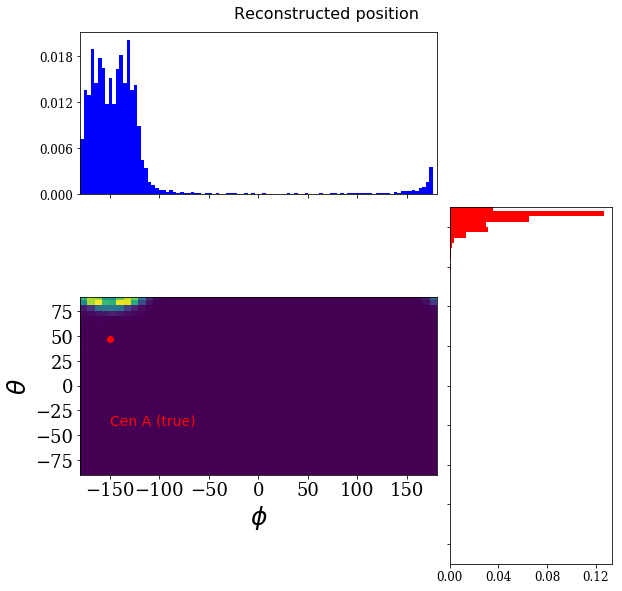

In [8]:
map_2D(phi,theta,filename="CenA_reco_newCoord_300m")

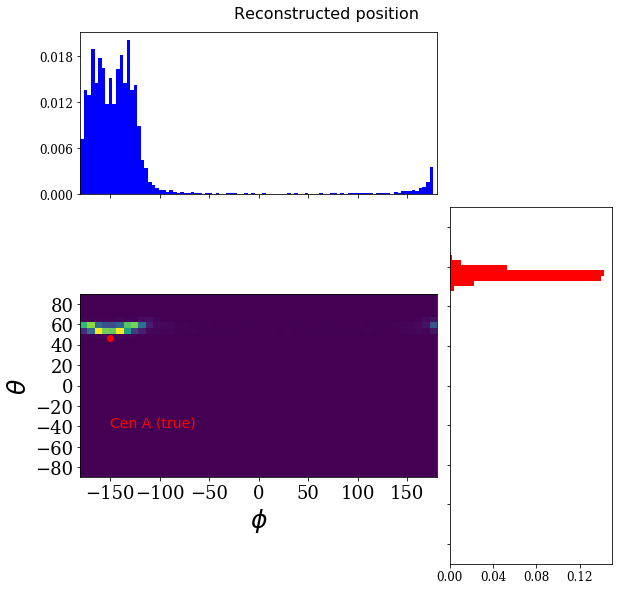

In [9]:
map_2D(phi,np.degrees(viewAnglAvg),filename="CenA_viewAng_newCoord")

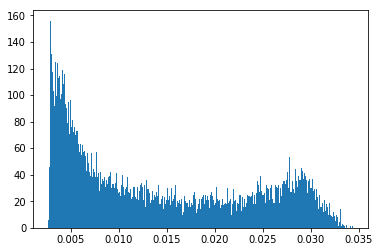

In [27]:
plt.hist(corr_value, bins=500);

In [28]:
len(phi)

16118

In [29]:
def kde1(x, y):
    from scipy.stats import gaussian_kde
    from matplotlib.colors import BoundaryNorm
    from matplotlib.ticker import MaxNLocator
    import matplotlib.colors as colors
    import matplotlib.ticker as ticker
    
    # Calculate the point density
    xy = np.vstack([x,y])
    kernel = gaussian_kde(xy, bw_method='silverman')

    xmin = min(x)
    xmax = max(x)
    ymin = min(y)
    ymax = max(y)
    
#     X, Y = np.mgrid[xmin:xmax:150j, ymin:ymax:150j]
#     positions = np.vstack([X.ravel(), Y.ravel()])
#     Z = np.reshape(kernel(positions).T, X.shape)
#     plt.figure(figsize=(8, 10))
#     cmap = plt.get_cmap('PiYG')
#     cmap = plt.imshow(np.rot90(Z), cmap=plt.cm.viridis,
#               extent=[xmin, xmax, -1, 1])
#     plt.colorbar(cmap,label='Probability density')
#     plt.xlim(-180,180)
#     plt.ylim(-90,90)
#     return cmap

#     plt.scatter(x, y,  s=5, edgecolor='')

In [30]:
themap = kde1(phi,theta)

In [6]:
from scipy.stats import gaussian_kde
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import matplotlib.colors as colors
import matplotlib.ticker as ticker
from matplotlib.colors import LogNorm

x=phi
y=np.cos(np.radians(theta))
# y = theta
xy = np.vstack([x,y])
kernel = gaussian_kde(xy, bw_method='silverman')

xmin = min(x)
xmax = max(x)
ymin = min(y)
ymax = max(y)

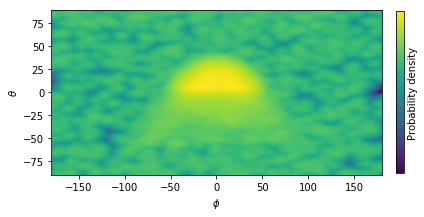

In [7]:
X, Y = np.mgrid[xmin:xmax:500j, ymin:ymax:500j]
positions = np.vstack([X.ravel(), Y.ravel()])
Z = np.reshape(kernel(positions).T, X.shape)
# plt.figure(figsize=(10, 15))
cmap = plt.get_cmap('PiYG')
cmap = plt.imshow(np.rot90(Z), cmap=plt.cm.viridis,
          extent=[xmin, xmax, -90, 90],norm=LogNorm())
plt.colorbar(cmap,label='Probability density',fraction=0.023, pad=0.04)
plt.xlim(-180,180)
# plt.ylim(-1,1)
plt.xlabel("$\phi$")
plt.ylabel("$\\theta$")

plt.tight_layout()
# plt.savefig("KDE_CenA_reco.pdf", dpi=200)

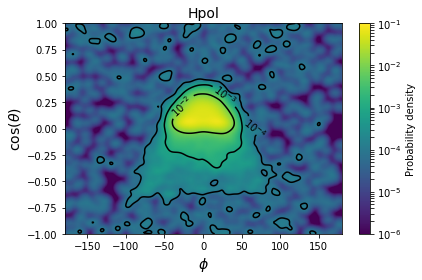

In [8]:
from matplotlib import ticker, cm

levels = [1e-4,1e-3,1e-2,1e-1]

contours = plt.contour(X, Y, Z,levels,locator=plt.LogLocator(),colors="black")
# cmap = plt.contourf(X, Y, Z,200)
fmt = ticker.LogFormatterMathtext()
fmt.create_dummy_axis()
plt.clabel(contours, contours.levels,color="black", fmt=fmt, inline=True)
cmap=plt.pcolormesh(X, Y, Z,shading='gouraud', norm=colors.LogNorm(vmin=1E-6, vmax=1e-1))

# cmap = plt.get_cmap('PiYG')
plt.colorbar(cmap,label='Probability density',norm=LogNorm())
plt.title("Hpol", fontsize=14)
plt.xlabel("$\phi$", fontsize=14)
plt.ylabel("$\cos(\\theta)$", fontsize=14)
plt.tight_layout()
# plt.savefig("KDE_CenA_recoPeak_300m_hpol.pdf", dpi=300)

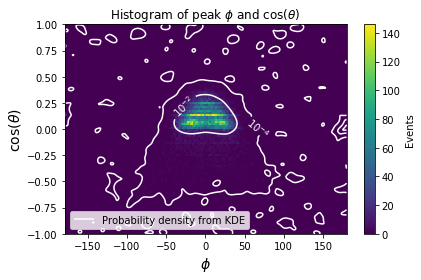

In [9]:
fig2, ax2 = plt.subplots()

CS2 = ax2.contour(X, Y, Z, locator=plt.LogLocator(),colors="white")
fmt = ticker.LogFormatterMathtext()
fmt.create_dummy_axis()
labels = ax2.clabel(CS2, CS2.levels, fmt=fmt, legend="d")
ax2.set_title("Histogram of peak $\phi$ and $\cos(\\theta)$")
theHist = plt.hist2d(phi,np.cos(np.radians(theta)), bins=[180,100]);
# plt.colorbar()
plt.xlabel("$\phi$", fontsize=14)
plt.ylabel("$\cos(\\theta)$", fontsize=14)
plt.colorbar(label='Events')
labels = ['Probability density from KDE']
for i in range(len(labels)):
    CS2.collections[i].set_label(labels[i])
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig("KDE_CenA_recoPeak_300m.pdf", dpi=300)

In [55]:
from sklearn.neighbors import KernelDensity

def kde2D(x, y, bandwidth, xbins=180j, ybins=360j, **kwargs): 
    """Build 2D kernel density estimate (KDE)."""

    # create grid of sample locations (default: 100x100)
    xx, yy = np.mgrid[-180.:180.:xbins, 
                      -1.:1.:ybins]

    xy_sample = np.vstack([yy.ravel(), xx.ravel()]).T
    xy_train  = np.vstack([y, x]).T

    kde_skl = KernelDensity(bandwidth=bandwidth, **kwargs)
    kde_skl.fit(xy_train)

    # score_samples() returns the log-likelihood of the samples
    z = np.exp(kde_skl.score_samples(xy_sample))
    return xx, yy, np.reshape(z, xx.shape)

In [58]:
x=phi
y=np.cos(np.radians(theta))
xx, yy, zz = kde2D(x, y, 0.1)

In [101]:
iso = kernel((-150,0.2))
#Sample from your KDE distribution
sample = kernel.resample(size=10000)

#Filter the sample
insample = kernel(sample) < iso

#The integral you want is equivalent to the probability of drawing a point 
#that gets through the filter
integral = insample.sum() / float(insample.shape[0])
print (integral)

0.0004


In [12]:
v = contours.collections[0].get_paths()[0].vertices
x = v[:,0]
y = v[:,1]

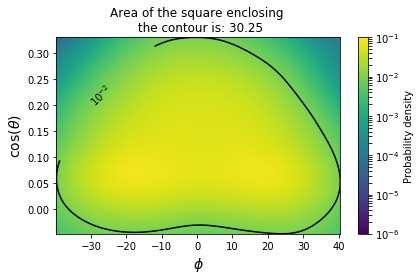

In [13]:
levels = [1e-2]

contours = plt.contour(X, Y, Z,levels,locator=plt.LogLocator(),colors="black")
# cmap = plt.contourf(X, Y, Z,200)
fmt = ticker.LogFormatterMathtext()
fmt.create_dummy_axis()
plt.clabel(contours, contours.levels,color="black", fmt=fmt, inline=True)
cmap=plt.pcolormesh(X, Y, Z,shading='gouraud', norm=colors.LogNorm(vmin=1E-6, vmax=0.1))

# cmap = plt.get_cmap('PiYG')
plt.colorbar(cmap,label='Probability density',norm=LogNorm())
# plt.colorbar(contours,label='Probability density')
plt.ylim(y.min(),y.max())
plt.xlim(x.min(),x.max())
plt.xlabel("$\phi$", fontsize=14)
plt.ylabel("$\cos(\\theta)$", fontsize=14)
plt.title("Area of the square enclosing \n the contour is: %0.2f" % (abs(x.max()-x.min())*abs(y.max()-y.min())))
plt.tight_layout()
# plt.savefig("1E2Box_CenA_recoPeak_300m.pdf", dpi=100)

In [291]:
np.log(29/(360*2))/5.96

-0.5389186882589978